<a id='frontmatter'></a>

# Welcome to `emd`!


<hr style="border:2px solid gray">


## Contents 

- [Front matter](#frontmatter)
    - [A short story](#narrative)[*]: or, the origins of `emd`, narratively
    - [Note to py4DSTEM developers](#devteam)[*]: an appreciation, an apology, and an intention
    - [The Example](#example): spoiler alert - it's gaussians

- [Code](#code)
    - [DataGenerator](#datagenerator): Generate data
    - [1st pass](#1stpass): initial attempt at data analysis
    - [Workflow --> Python class](#class): bundling the analysis workflow into a class definition
    - [Save and load](#io): use `emd` to write and read the workflow
    - [Many datasets](#manydatasets): analyze, write, and read many datasets


[*] may be skipped without loss of continuity

<hr style="border:2px solid gray">

 <a id='narrative'></a>
 
## A short story

When I was a grad student I went through the following process a number of times.  First, I'd run some experiment and get a bunch of data.  I'd look through that data for a while, and eventually pick one or two good datasets to start the analysis.  Then I'd fire up a Python environment and do some initial analysis, probably making some plots to try to visualize and understand what was happening.


Once I had some analysis code that I felt quantified whatever I was trying to look at in some reasonable way, and perhaps had tested it on a few datasets, I'd modify it to run on all the datasets I had on hand, which might be 10 or 20 or 100 or 200.  This is where I'd run into my archnemesis, the i/o problem.  And by the i/o problem I mean this glorious, horrible, ridiculously trivial task: save a file, then read the file.


I/O is weird.  It seems to me like its one of these things that tons of folks.....myself *definitely* included..............just...want....to....WORK.  We don't want to deal with it.  It's not important in-and-of-itself - it's just the bookkeeping we need to do to actually *get* to the important stuff.  And every time I've confronted the i/o problem I've made battle, for some period of time, with [this classic conundrum](https://xkcd.com/1205/).  Inevitably, I've ended up spending....say, N hours trying to devise a general - and by general I mean re-usable - solution, before giving up and spending M hours doing it however was quickest and easiest for that case.  M was very typically rather less than N in the end.  The duration of M would vary by case - different experiments, datasets, and analyses leading to different data artifacts, as they will.  For 10 or 20 source datasets, even for complex workflows, a manual approach is often perfectly sufficient.  For 100 datasets, and certainly for 1000, I would typically cobble together some simple write/read code for the use case at hand and move on.


The thing that's interesting to me about all those N hours.......the $\sum N$ hours.......is that whether or not they were wasted time remains an undecided variable of the universe.  Now, if you're thinking "wasted time" is a matter of perspective and opinion, among other flavors of subjective - that's true, fair enough - and, for some reasonable definitions of terms, ya, that time....*might* have been wasted.  But - it also may not have been!  Because the questions remains: (a) will such a more general system yet emerge from all that effort? and (2) how much use and saved time will I, and perhaps even others, get out of such a system in the future.  So the answer to Mr. Monroes question -- *is it worth the time* -- will depend on the answers to these former two questions.


Well, I don't know about (b) yet, but the answer to (a) is: it's done!  For now anyway... ;p


It's called `emd`, and it's a python package defining read/write functions and a set of classes which interface between long term storage (in the form of HDF5 files) and some Python runtime objects.  These objects can either be used as-is to store and retrieve data and metadata, or subclassed to make your own objects, with your own analysis methods, with the added benefit that they'll already know how to quickly and easily write your whole analysis pipeline to file when you're done.  The EMD 1.0 file specification, and the `emd` writer/readers, support any number of data trees in a single file, so you can write and read results of some analysis on 100 different experiments or 1000 different simulation runs to one file, come back to it later, or share it with anyone else in the world who can read it with a call of `pip install emd` in the command line and `emd.read(your_file)` from a Python interpreter.

 <a id='narrative'></a>

## A note to the py4dstem dev team



It's been a bit of a slog and I owe a debt of gratitude to everyone who's tolerated how perilously long N has become, as well as an apology to everyone who's had to sit through the ordeal of Colin trying to kindly cojole me into letting M be good enough alone.  Colin, many thanks to you in particular for your patience and suport.


I didn't really mean to make this package.  Truly, I just felt like i/o for py4DSTEM was my chance to finally, finally defeat the bugbear of i/o as I've described it above, and, in hunting the great white whale, got a little lost at sea.  (If you peered into the lovecraftian, non-euclidean, non-abelian horror of convolution (geddit?) that was the py4DSTEM io module over the last N years, you know of what I speak).  In trying to clean up the mess, `emd` seemed the sensible way out and forward.


So here we are - I hope the finished product is worth it.  I intend to use this package in the future - I think it will be quite useful - and py4DSTEM will, as I believe I may have mentioned, be built on top of it, so even if you don't want to use it for future projects yourself, perhaps you may end up finding it of some interest.  If you do, I hope these docs - this notebook, the companion walkthrough.ipynb, and the sample custom class building module - are at your disposal.  I am of course happy to discuss anything herein or `emd` related, should thoughts arise.


That said - maybe the best thing I can say about completing the `emd`/`py4dstem` separation is that once this is done - and after a hopefully short period of adding io support for the workflows - we can by and large stop talking about i/o.  It is, after all, something meant to support the stuff that actually matters.  


To that end, I'm planning not to really talk about `emd` in `py4dstem` meetings in the future, at least to the extent that it's avoidable.  It's basically done now, and that's that.  I don't know if anyone would admit it, but suspect that perhaps some of you would agree with my assessment of the last couple of py4DSTEM dev meetings: to be blunt - unmitigated disasters.  Ok, sure, maybe this is strong language.  But: they have not been good meetings.  I know what good meetings look and feel like, and I know bad ones -- indeed, i am possessed of that deep, abiding, furious distaste for pointless meeting that didn't need to happen that perhaps some of you also know of -- making it just endlessly ironic to me that I find myself now running and biweekly standing meeting that has occassioned into pointless land.


So what's the point?  This: `emd` is banished from `py4dstem`!  Ergo, `py4dstem` meetings will henceforce be for `py4dstem`.  Scope thusly defined, may our meetings now be a little more focused.  QED.


Woot!


<a id='example'></a>


## The Example

A common trajectory in analyzing data is

1. an initial pass at analyzing a datasets
2. bundling code from (1) so that it can be run on many datasets
3. saving the results, and reading them again later

In the example below, we'll generate some data and then do step (1) in the form of some simple analysis in a few Jupyter cells.  For step 2 we'll wrap the code from the previous step into a class.  For step 3, we'll add a few lines of code from the `emd` package to the end of our class, enabling write/read in and out of an HDF5 file.  We'll wrap up by running our analysis class on many datasets, save all the results to an H5 file, then load it again and plot some results.

<a id='code'></a>
<hr style="border:2px solid gray">

# Code



In [1]:
%load_ext autoreload
%autoreload 2

 <a id='generatedata'></a>

## Generate Data

In [1]:
# Generate data


# This cell defines a class that makes datasets
# our data will 3D stacks consisting of 8 frames of 256x256 images which
# contain some gaussian blob moving at a constant trajectory between frames


shape = (256,256,8)

import numpy as np
from scipy.stats import poisson


class DataGenerator:
    
    params = {'A':5, 'sigx':12, 'sigy':9}  # 2D gaussian params
    mu_scale = 1                           # scaling for Poisson draws
    
    def __init__(self, xy0, v0):
        """ 2-tuples xy0 and v0
        """
        
        # set the initial position and velocity
        self.xy0 = np.array(xy0)
        self.v0 = np.array(v0)

        # find the center at each time point
        self.xy = self.xy0[:,np.newaxis] + \
            np.tile(np.arange(8),(2,1))*self.v0[:,np.newaxis]
        
        # make the data
        self.generate_data()


    def generate_data(self):
        
        # make a meshgrid
        yy,xx = np.meshgrid(np.arange(shape[1]),np.arange(shape[0]))
        self.xx,self.yy = xx-shape[0]/2., yy - shape[1]/2.
        
        # extend in the third dimension and center
        self.xx = np.dstack([ self.xx[:,:,np.newaxis] - x for x in self.xy[0,:] ])
        self.yy = np.dstack([ self.yy[:,:,np.newaxis] - y for y in self.xy[1,:] ])
        
        # get the data
        
        #print(DataGenerator.params)
        
        self.data = poisson.rvs(
            self.gaussian((self.xx,self.yy), **(DataGenerator.params)) * DataGenerator.mu_scale
        )
    
    @staticmethod
    def gaussian(p,A,sigx,sigy):
        return A * np.exp(-(0.5*(p[0]/sigx)**2)) * np.exp(-(0.5*(p[1]/sigy)**2))


    
# generate some data
xy0 = (-17,-9)
v0 = (6,8)
data_generator = DataGenerator(xy0, v0)

 <a id='1stpass'></a>

## Analysis - first pass

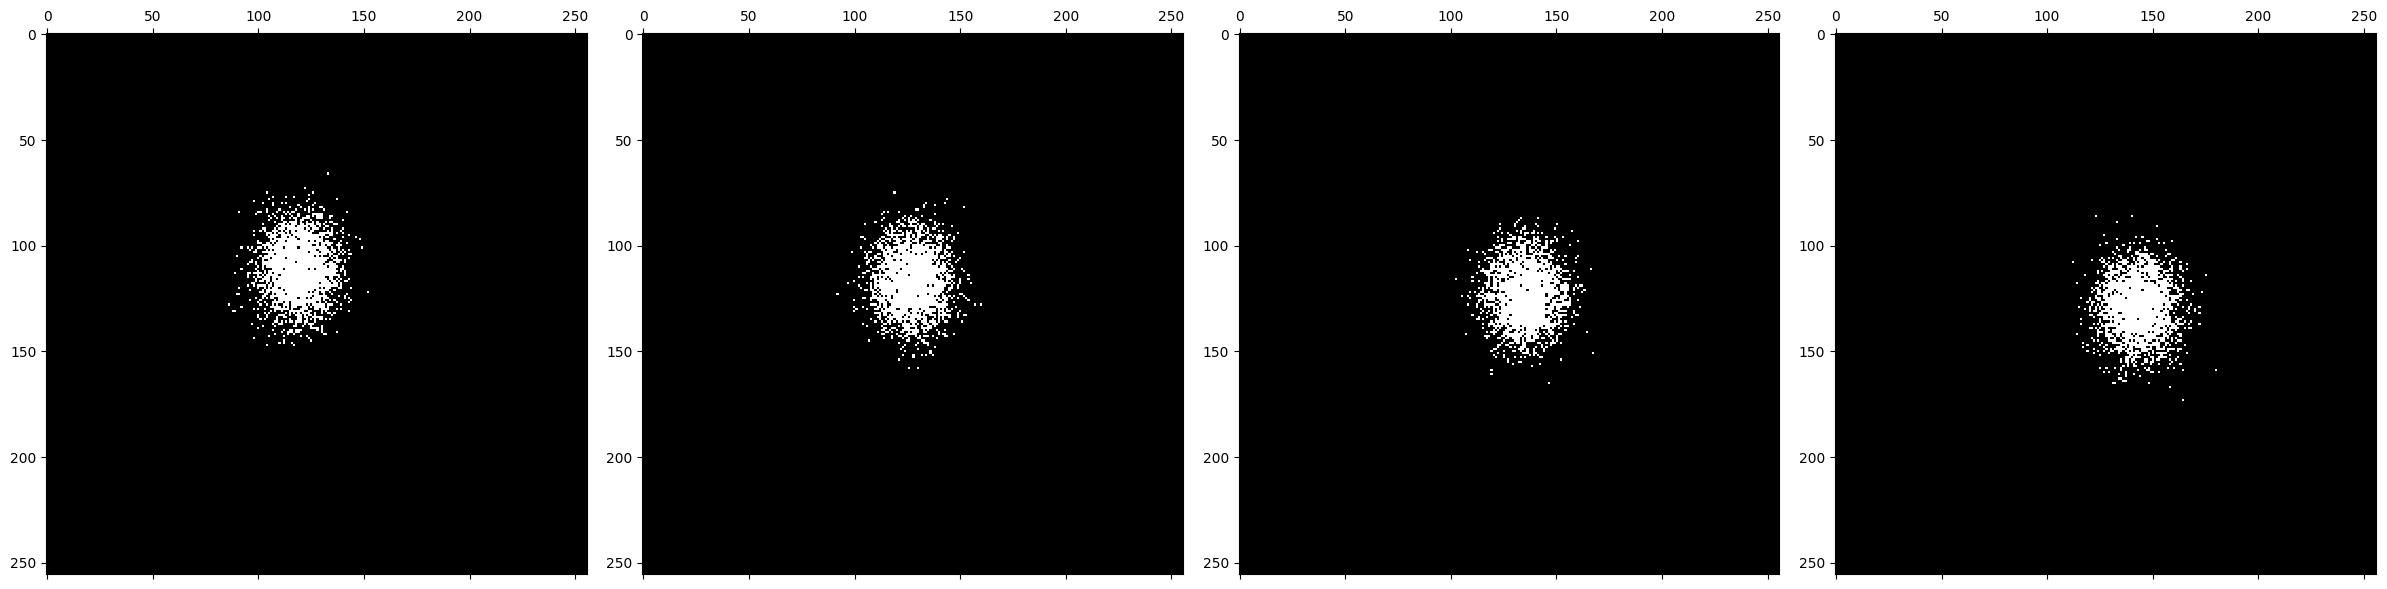

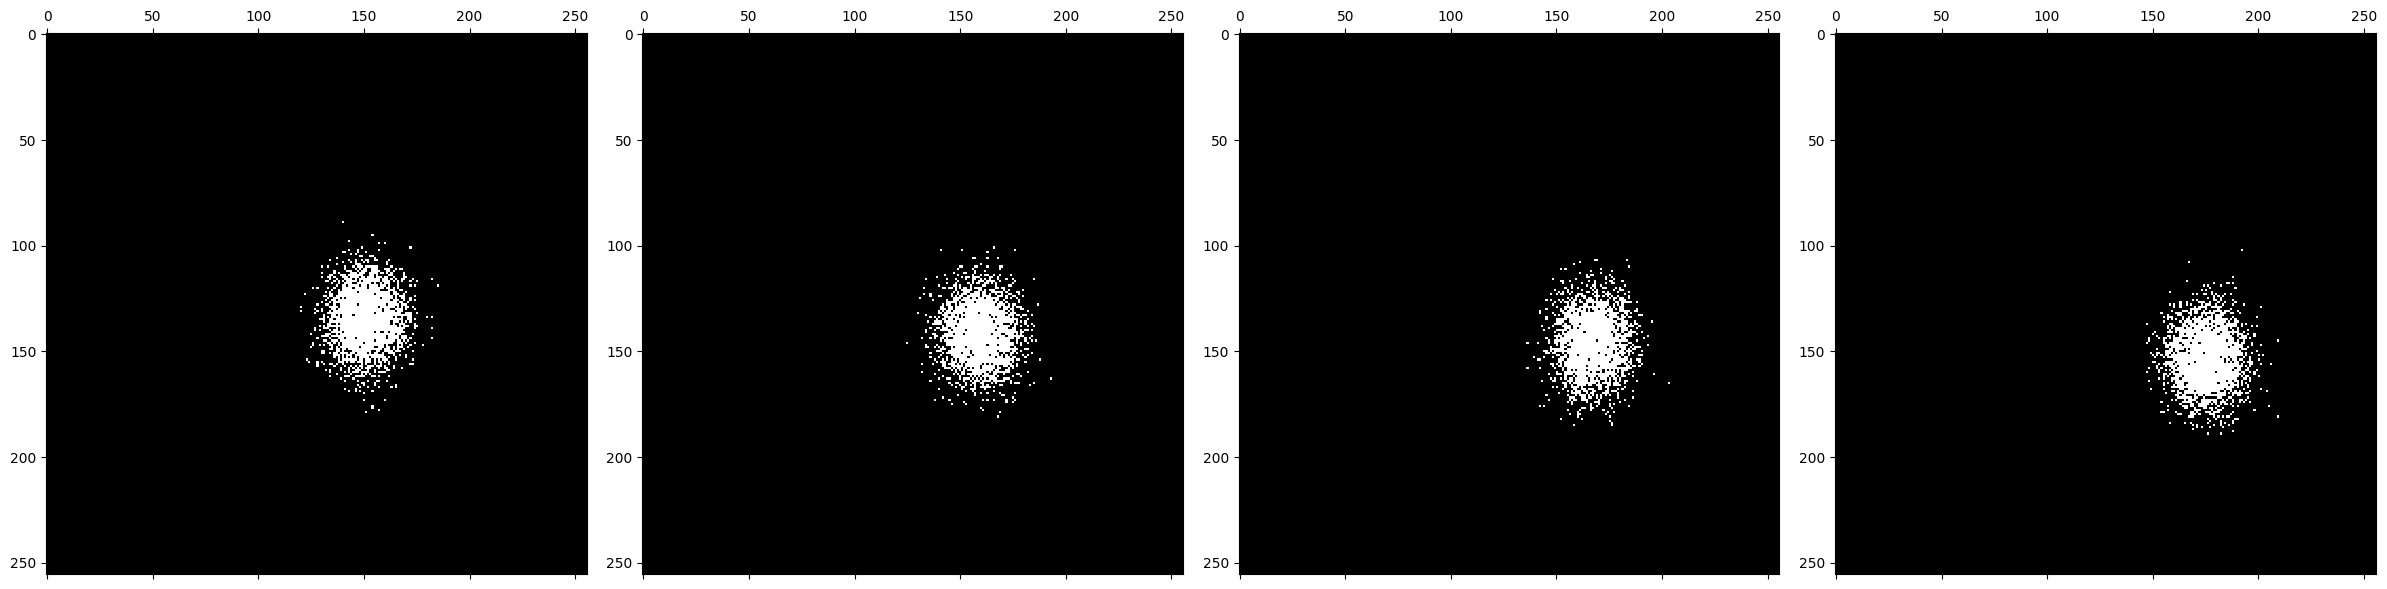

In [2]:
# visualize the data


# we use py4DSTEM.visualize to show a few plots - otherwise,
# py4DSTEM is not used in any way outside of the `emd` module

from py4DSTEM.visualize import show


show([data_generator.data[:,:,idx] for idx in [0,1,2,3]])
show([data_generator.data[:,:,idx] for idx in [4,5,6,7]])

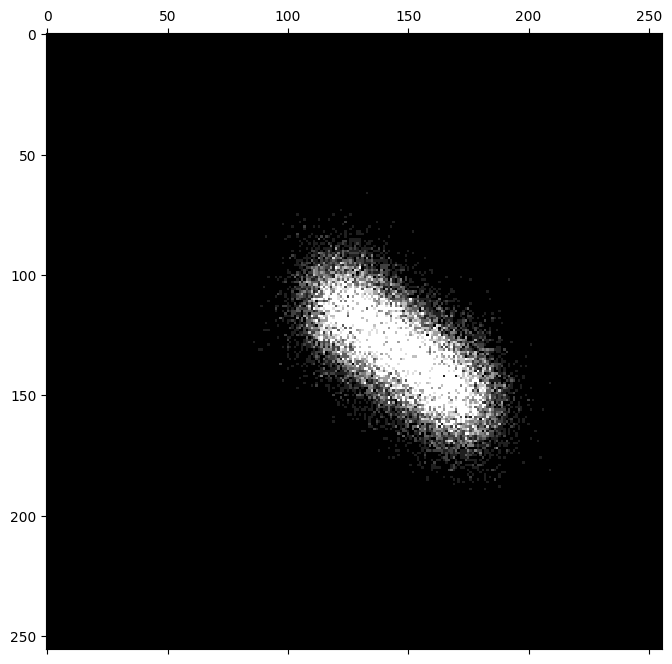

In [3]:
# The mean

show(np.mean(data_generator.data,axis=2))

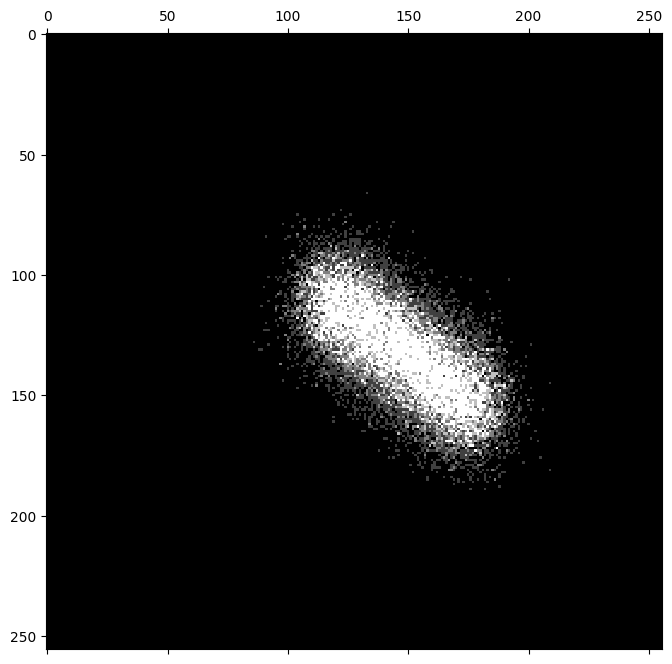

In [4]:
# The max

show(np.max(data_generator.data,axis=2))

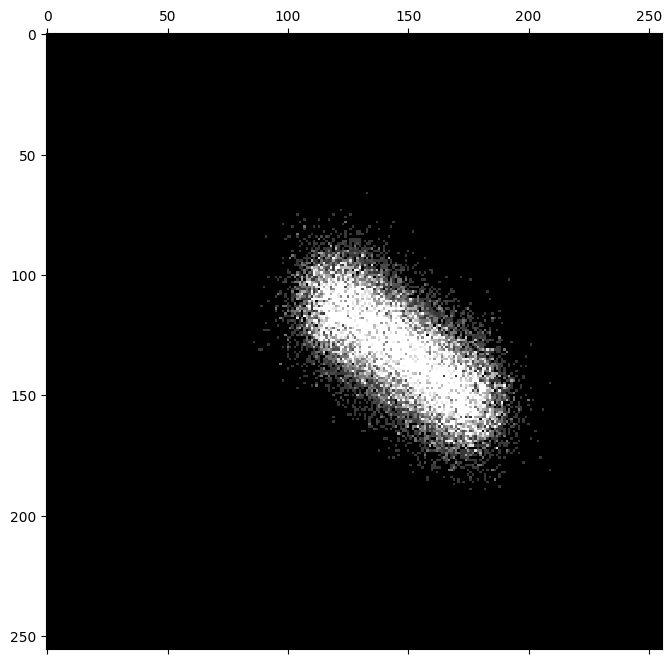

In [5]:
# The std

show(np.std(data_generator.data,axis=2))

In [6]:
# The CoM

def get_com(im):
    tot = np.sum(im)
    yy,xx = np.meshgrid(np.arange(shape[1]),np.arange(shape[0]))
    return (np.sum(xx*im)/tot, np.sum(yy*im)/tot)

com = get_com(data_generator.data[:,:,0])
com

(111.18673290473407, 118.95791934541204)

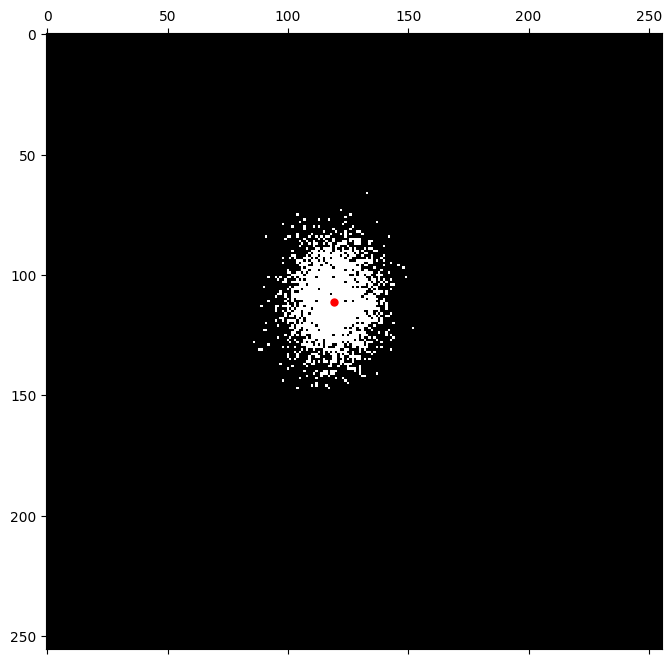

In [7]:
# Show overlay

show(data_generator.data[:,:,0],points={'x':com[0],'y':com[1]})

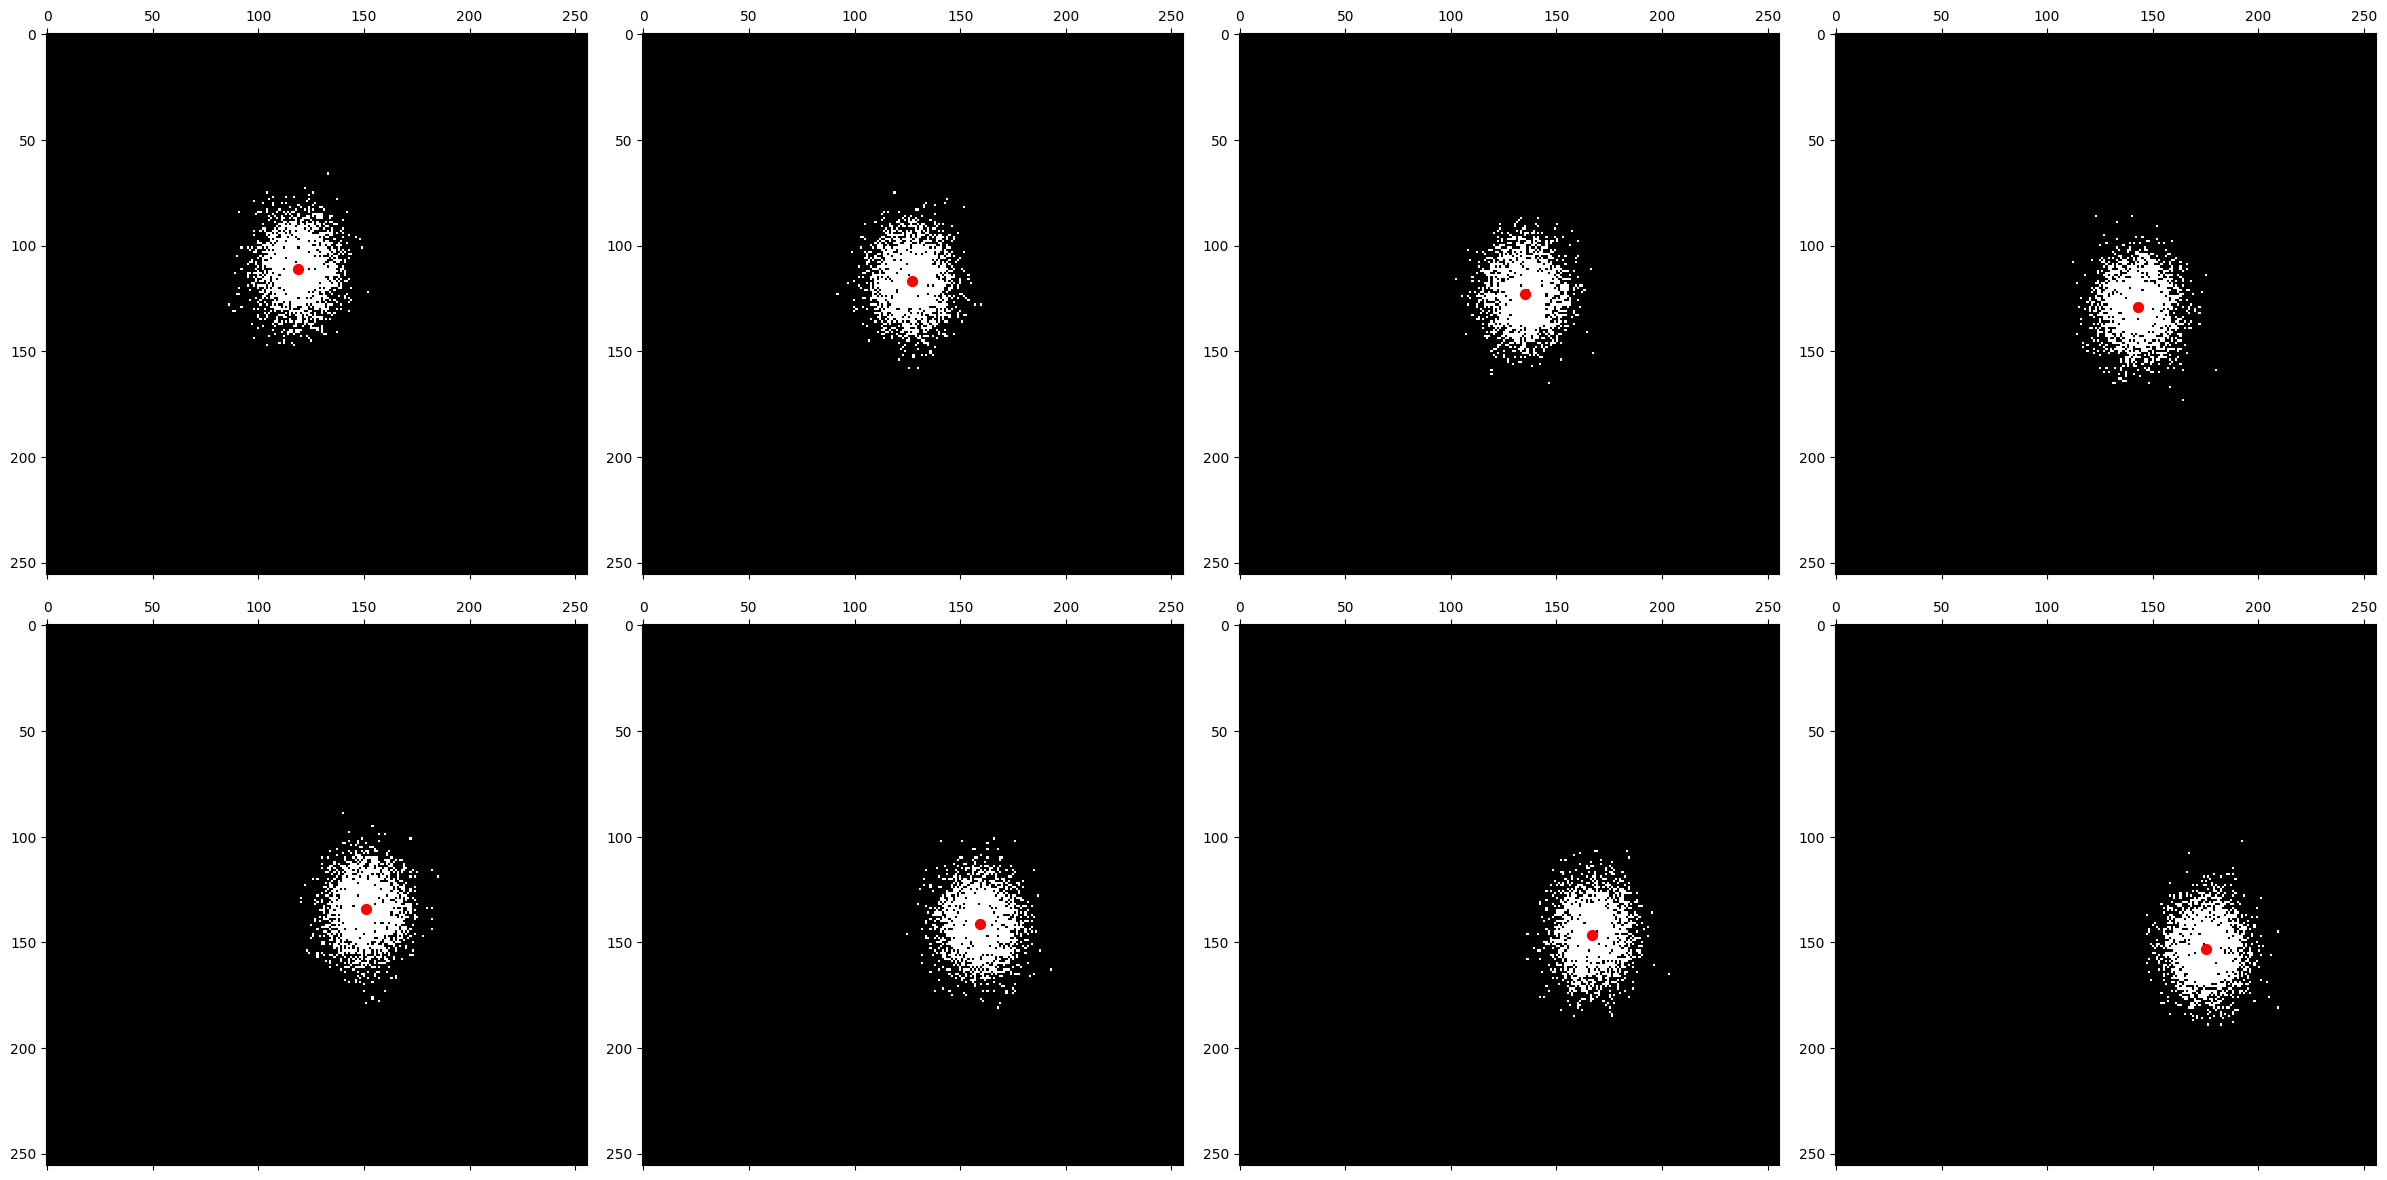

In [8]:
# get all coms and show

coms = np.array([get_com(data_generator.data[:,:,i]) for i in range(shape[2])]).T

from py4DSTEM.visualize import show_image_grid
show_image_grid(
    lambda i:data_generator.data[:,:,i],
    H=2,W=4,
    get_x = lambda i: coms[0,i],
    get_y = lambda i: coms[1,i],
)

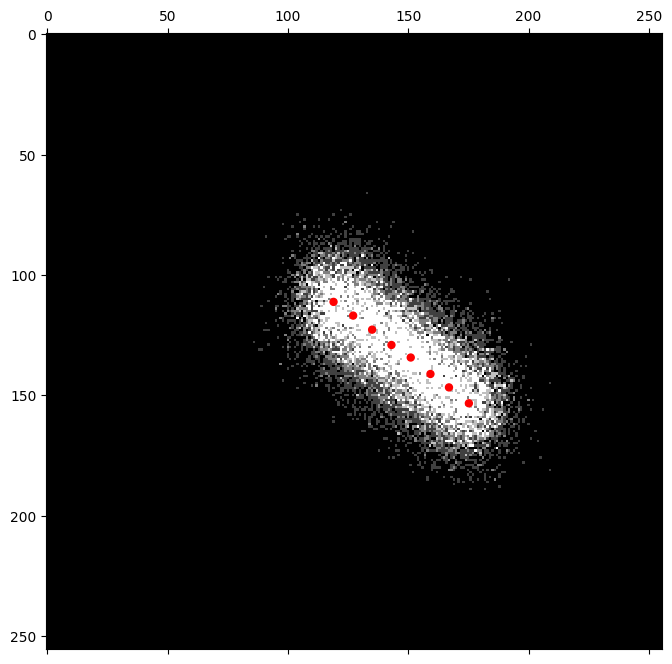

In [9]:
show(
    np.max(data_generator.data,axis=2),
    points={'x':coms[0,:],'y':coms[1,:]},
)

 <a id='class'></a>


## Workflow --> Python class

In this section, the analysis above is wrapped into a class which ingests a single dataset, and has methods to perform each of the steps above.

In [10]:
# Define the analysis class


class CoolScienceWorkflow:
    """
    Analysis for A Very Important Investigation into the Apparent Motion of Fuzzy Blobs
    """
    
    def __init__(self, name, data):
        """
        """
        self.name = name
        self.data = data

        
    # analysis methods
        
    def get_max(self):
        self.max = np.max(self.data,axis=2)
    def get_mean(self):
        self.mean = np.mean(self.data,axis=2)
    def get_std(self):
        self.std = np.std(self.data,axis=2)
    
    @staticmethod
    def get_com(im):
        tot = np.sum(im)
        yy,xx = np.meshgrid(np.arange(shape[1]),np.arange(shape[0]))
        return (np.sum(xx*im)/tot, np.sum(yy*im)/tot)
    
    def get_coms(self):
        self.coms = np.array([get_com(self.data[:,:,i]) for i in range(shape[2])]).T


In [11]:
# Perform analysis


# instantiate
my_analysis = CoolScienceWorkflow(
    name='1st_try',
    data=data_generator.data
)

# analyze
my_analysis.get_max()
my_analysis.get_mean()
my_analysis.get_std()
my_analysis.get_coms()

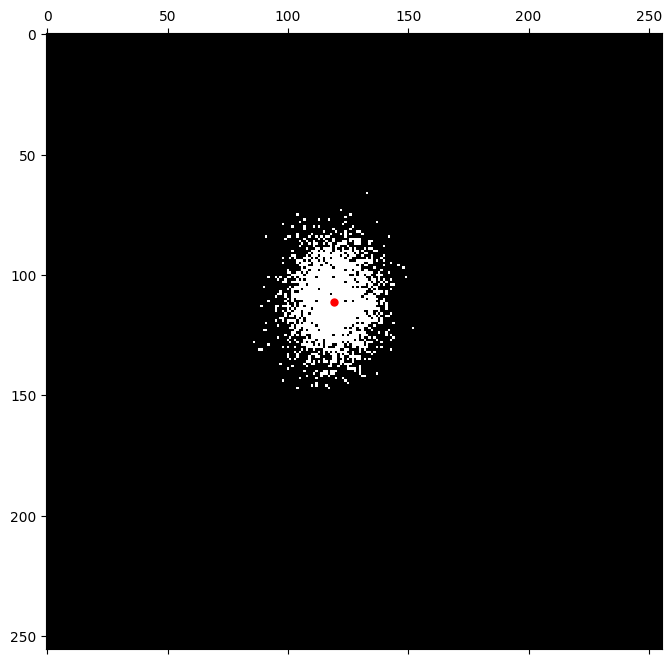

In [12]:
# we won't show all the visualization - they're the same, with slightly modified syntax, e.g. -

show(
    my_analysis.data[:,:,0],
    points={'x':my_analysis.coms[0,0],'y':my_analysis.coms[1,0]}
)

<a id='io'></a>

## Save and load

Here we extend the previous class with two methods - one which wraps the data in `emd` classes and links them, and one which saves to file.  Reading is then accomplished with `emd.read`.

In [13]:
# filepath handling utilities

# note that `emd` by default errors when save is attempted to existing filepaths unless
# overwrite or append mode is invoked. here, we'll just use a little clean() funtion to
# remove files we're done with to keep things tidy :p


filepath = "/Users/Ben/Desktop/test.h5"

from os.path import exists
from os import remove
def clean():
    if exists(filepath):
        remove(filepath)

In [15]:
# Extend analysis class to support i/o


import emdfile as emd     # `emd` at last!


class ReadAndWritable_CoolScienceWorkflow:
    """
    Analysis and io for A Very Important Experiment
    """
    
    def __init__(self, name, data):
        """
        """
        self.name = name
        self.data = data

        
    # analysis methods
        
    def get_max(self):
        self.max = np.max(self.data,axis=2)
    def get_mean(self):
        self.mean = np.mean(self.data,axis=2)
    def get_std(self):
        self.std = np.std(self.data,axis=2)
    
    @staticmethod
    def get_com(im):
        tot = np.sum(im)
        yy,xx = np.meshgrid(np.arange(shape[1]),np.arange(shape[0]))
        return (np.sum(xx*im)/tot, np.sum(yy*im)/tot)
    
    def get_coms(self):
        self.coms = np.array([get_com(self.data[:,:,i]) for i in range(shape[2])]).T


    
    # io methods
    
    def build_tree(self):
        """ Here the data we want to keep gets wrapped into instances of the
            simplest EMD class, `Array`, then linked together by placing them all
            in an EMD tree. You can read more about trees in the package walkthrough.
            Linking the data in a tree allows everything to be save together with
            one call to `emd.save`
        """
        
        # make a new tree root
        self.root = emd.Root( name=self.name )
        
        # wrap the derived data in emd classes
        ar_max = emd.Array( name='max', data=self.max)
        ar_mean = emd.Array( name='mean', data=self.mean)
        ar_std = emd.Array( name='std', data=self.std)
        ar_coms = emd.Array( name='coms', data=self.coms )
        
        # build the tree
        self.root.tree( ar_max )
        self.root.tree( ar_mean )
        self.root.tree( ar_std )
        self.root.tree( ar_coms )
    
    def save(self,fp):
        """ Save the data. If the file path doesn't exist, makes a new file and saves.
            If it does, appends the data to the existing file.
        """
        self.build_tree()
        if not exists(fp):
            emd.save(fp, self.root)
        else:
            emd.save(fp, self.root, mode='a')

In [16]:
clean()

In [17]:
# Analyze the data


# ((instantiate))
my_analysis = ReadAndWritable_CoolScienceWorkflow(
    name='1st_try',
    data=data_generator.data
)

# ((analyze))
my_analysis.get_max()
my_analysis.get_mean()
my_analysis.get_std()
my_analysis.get_coms()


# and save it
my_analysis.save(filepath)

In [18]:
# We can look at the contents of the file without loading anything

emd.print_h5_tree(filepath)

/
|--1st_try
	|--coms
	|--max
	|--mean
	|--std




In [19]:
# And we can load the data

loaded_data = emd.read(filepath)

In [20]:
# The data is accessible as

ar_max = loaded_data.tree('max')
ar_mean = loaded_data.tree('mean')
ar_std = loaded_data.tree('std')
ar_coms = loaded_data.tree('coms')

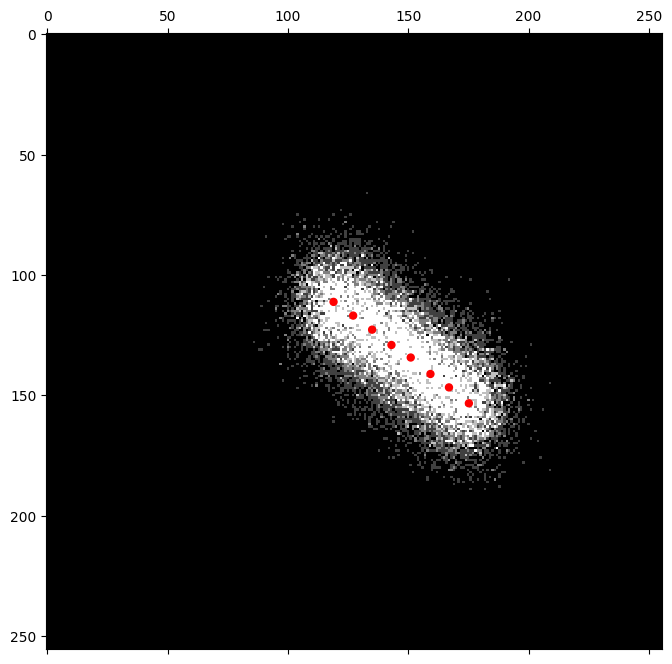

In [21]:
# And can be visualized as before

show(
    ar_max,
    points={'x':ar_coms[0,:],'y':ar_coms[1,:]}
)

In [22]:
# Notice that the data itself are no longer numpy ndarrays - they are emd Arrays.
# Which is essentially a numpy array, but better...!

ar_mean

Array( A 2-dimensional array of shape (256, 256) called 'mean',
       with dimensions:

       dim0 = [0,1,...] pixels
       dim1 = [0,1,...] pixels
)

<a id='manydatasets'></a>


# Many datasets 

Here we generate 100 datasets, analyze them, save them to a single HDF5 file, then use the file to load info from all 100 datasets, which we plot together.

In [23]:
clean()

In [24]:
# Generate 100 datasets

from scipy.stats import uniform,cosine

centers = uniform.rvs(-10,20,size=(2,100))  # uniform distribution from -10 to 10
vmag = uniform.rvs(0,10,size=100)           # uniform distribution from 0 to 10
vang = cosine.rvs(0,np.pi/4,size=100)       # cosine distribution from -pi/2 to pi/2
velocities = np.vstack(
    [vmag*np.sin(vang),
     vmag*np.cos(vang)]
)


# build the datasets
datasets = []
for idx in range(100):
    
    datasets.append( DataGenerator(centers[:,idx], velocities[:,idx]) )

In [25]:
# Analyze

for idx in range(100):
    
    # instantiate
    analysis = ReadAndWritable_CoolScienceWorkflow(
        name = f'experiment_{idx}',
        data = datasets[idx].data
    )

    # analyze
    analysis.get_max()
    analysis.get_mean()
    analysis.get_std()
    analysis.get_coms()
    
    # and save
    analysis.save(filepath)

In [26]:
# The tree for this HDF5 file is large...

emd.print_h5_tree(filepath)

/
|--experiment_0
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_1
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_10
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_11
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_12
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_13
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_14
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_15
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_16
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_17
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_18
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_19
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_2
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_20
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_21
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_22
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_23
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experiment_24
|	|--coms
|	|--max
|	|--mean
|	|--std
|--experime

In [27]:
# Later we can come back and load the data...

loaded_data = emd.read(filepath)

Multiple root groups detected - returning root names. Please specify the `emdpath` argument. Returning the list of rootgroups.


In [28]:
# Because we added all 100 experiments to one file, `emd` is prompting us to specify which experiment we want
# to load, and returned to us a list of all the options

loaded_data

['experiment_0',
 'experiment_1',
 'experiment_10',
 'experiment_11',
 'experiment_12',
 'experiment_13',
 'experiment_14',
 'experiment_15',
 'experiment_16',
 'experiment_17',
 'experiment_18',
 'experiment_19',
 'experiment_2',
 'experiment_20',
 'experiment_21',
 'experiment_22',
 'experiment_23',
 'experiment_24',
 'experiment_25',
 'experiment_26',
 'experiment_27',
 'experiment_28',
 'experiment_29',
 'experiment_3',
 'experiment_30',
 'experiment_31',
 'experiment_32',
 'experiment_33',
 'experiment_34',
 'experiment_35',
 'experiment_36',
 'experiment_37',
 'experiment_38',
 'experiment_39',
 'experiment_4',
 'experiment_40',
 'experiment_41',
 'experiment_42',
 'experiment_43',
 'experiment_44',
 'experiment_45',
 'experiment_46',
 'experiment_47',
 'experiment_48',
 'experiment_49',
 'experiment_5',
 'experiment_50',
 'experiment_51',
 'experiment_52',
 'experiment_53',
 'experiment_54',
 'experiment_55',
 'experiment_56',
 'experiment_57',
 'experiment_58',
 'experiment_59'

In [29]:
# Here we enumerate over all the experiments we saved into the file, and
# extract the centers of mass we already calculated, and use them to
# find the blobs' mean velocities

orientations = np.empty(100)

for idx,rootname in enumerate(loaded_data):   # loop through all the experiments
    
    root = emd.read(filepath, emdpath=rootname)     # open this experiment
    coms = root.tree('coms')                  # get the centers of mass
    v_mean = coms[:,-1] - coms[:,0]           # determine the velocity orientation
    orientations[idx] = np.angle(-1j*v_mean[0]+v_mean[1])


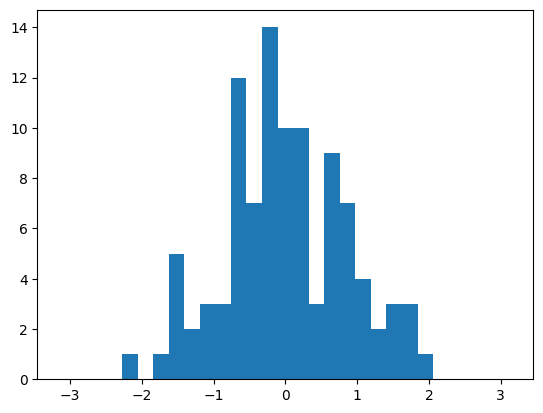

In [30]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.hist(orientations, bins=np.linspace(-np.pi,np.pi,30))
plt.show()